In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 27 21:53:34 2015

@author: nymph
"""


#################################### Read the data ############################
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import numpy as np

''' read_csv()
The read_csv() function in pandas package parse an csv data as a DataFrame data structure. What's the endpoint of the data?
The data structure is able to deal with complex table data whose attributes are of all data types. 
Row names, column names in the dataframe can be used to index data.
'''

data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original", delim_whitespace = True, \
 header=None, names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car_name'])

data['mpg']
data.mpg
data.iloc[0,:]

print(data.shape)


(406, 9)


In [2]:
################################## Enter your code below ######################
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [3]:
# 1. How many cars and how many attributes are in the data set.
print(f"There are {data.shape[0]} cars and {data.shape[1]} attributes.")

There are 406 cars and 9 attributes.


In [4]:
# 2. How many distinct car companies are represented in the data set? 
data['company'] = list(zip(*data['car_name'].str.split(' ')))[0]
print(f"There are {data['company'].drop_duplicates().count()} distinct car companies are represented in the data set")

There are 38 distinct car companies are represented in the data set


In [5]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,company
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,chevrolet
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,buick
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,plymouth
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,amc
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl,ford
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup,vw
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage,dodge
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger,ford


In [6]:
# What is the name of the car with the best MPG? 
print(f"{data[data.mpg == data.mpg.max()].car_name.values[0]} is the car with the best MPG.")

mazda glc is the car with the best MPG.


In [7]:
# What car company produced the most 8-cylinder cars? 
num_8_cyl_com = data[data.cylinders == 8.0][['company','car_name']].groupby(['company']).count()
print(f"{num_8_cyl_com[num_8_cyl_com.car_name == num_8_cyl_com.car_name.max()].index[0]} produced the most 8-cylinder cars.")

ford produced the most 8-cylinder cars.


In [8]:
# What are the names of 3-cylinder cars? 
list(data[data.cylinders == 3].car_name)

['mazda rx2 coupe', 'maxda rx3', 'mazda rx-4', 'mazda rx-7 gs']

In [9]:
# Do some internet search that can tell you about the history and popularity of those 3-cylinder cars.


In [10]:
# 3. What is the range, mean, and standard deviation of each attribute? Pay attention to potential missing values.
miss_rate = Series(data.isnull().mean() * 100, name='missing_rate')
data.describe().append(miss_rate)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,company
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000,NaN,NaN
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966,NaN,NaN
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN,NaN
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000,NaN,NaN
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000,NaN,NaN
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000,NaN,NaN
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,NaN,NaN
missing_rate,1.970443,0.000000,0.000000,1.477833,0.000000,0.000000,0.000000,0.000000,0.0,0.0


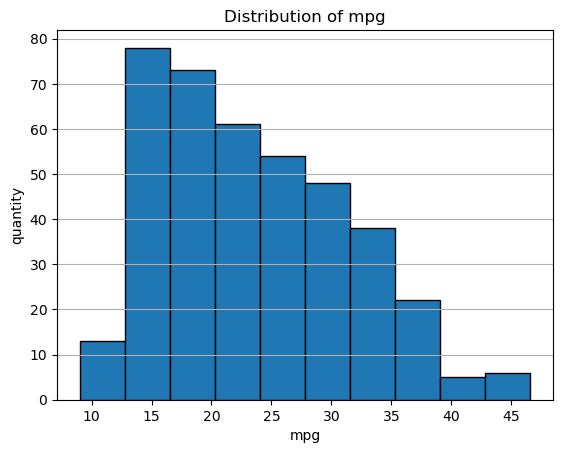

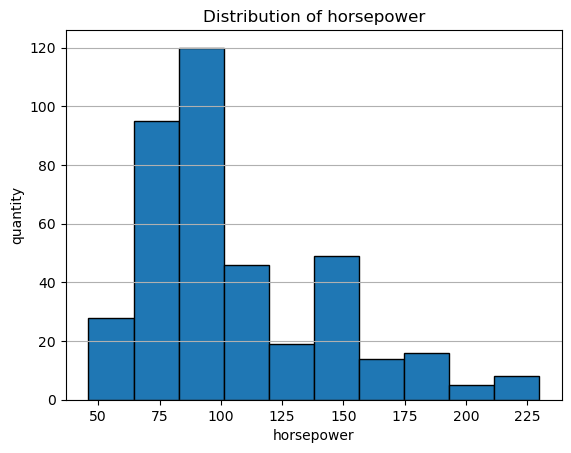

In [11]:
import matplotlib.pyplot as plt
# 4. Plot histograms for each attribute. Pay attention to the appropriate choice of number of bins.
def plot_hist(attribute):
    plt.hist(data[attribute], edgecolor = "black")
    plt.title(f'Distribution of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('quantity')
    plt.grid(axis='y')
    plt.show()
plot_hist('mpg')
plot_hist('horsepower')

# Write 2-3 sentences summarizing some interesting aspects of the data by looking at the histograms.


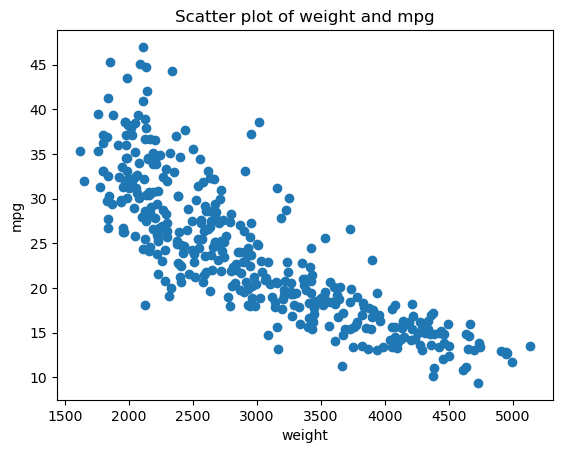

When we look at the entire chart, we see that weight rises, mgp tends to decrease.
The correlation coefficient between the 2 attributes is negative and equal: -0.8322442148315753


In [12]:
# 5. Plot a scatterplot of weight vs. MPG attributes. 
def plot_scatter(attr_1, attr_2):
    plt.scatter(data[attr_1], data[attr_2] + np.random.random(len(data.mpg)))
    plt.title(f'Scatter plot of {attr_1} and {attr_2}')
    plt.xlabel(attr_1)
    plt.ylabel(attr_2)
    plt.show()

def plot_scatter_extract(attr_1, attr_2, df):
    plt.scatter(df[attr_1], df[attr_2] + np.random.random(len(df.mpg)))
    plt.title(f'Scatter plot of {attr_1} and {attr_2}')
    plt.xlabel(attr_1)
    plt.ylabel(attr_2)
    plt.show()

plot_scatter('weight', 'mpg')
# What do you conclude about the relationship between the attributes? 
print('When we look at the entire chart, we see that weight rises, mgp tends to decrease.')
# What is the correlation coefficient between the 2 attributes?
"""the correlation coefficient between the 2 attributes is negative."""
data5 = data.dropna()
value = np.corrcoef(np.array(data5['weight'].values), np.array(data5['mpg'].values))[0, 1]
print(f'The correlation coefficient between the 2 attributes is negative and equal: {value}')


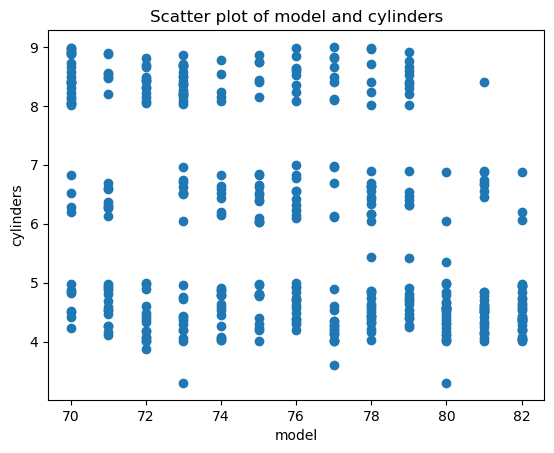

When we look at the entire chart, we see that weight rises, cylinders tends to decrease.
The correlation coefficient between the 2 attributes is negative and equal: -0.3456474403380831


In [13]:
# 6. Plot a scatterplot of year vs. cylinders attributes. 
# Add a small random noise to the values to make the scatterplot look nicer. 
# (Hint: data.mpg + np.random.random(len(data.mpg)) will add small random noise)
plot_scatter('model', 'cylinders')
# What can you conclude?
# Do some internet search about the history of car tgcf vmfkhg during 70’s that might explain the results.
print('When we look at the entire chart, we see that weight rises, cylinders tends to decrease.')
value = np.corrcoef(np.array(data5['model'].values), np.array(data5['cylinders'].values))[0, 1]
print(f'The correlation coefficient between the 2 attributes is negative and equal: {value}')

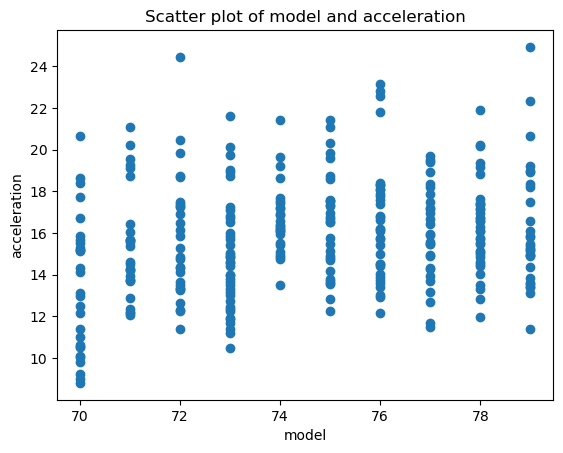

When we look at the entire chart, we see that model rises, acceleration tends to rise.
The correlation coefficient between the 2 attributes is positive and equal: 0.24222651078606197


In [14]:
data6 = data5.loc[data5['model'] < 80]
plot_scatter_extract('model', 'acceleration',data6)
print('When we look at the entire chart, we see that model rises, acceleration tends to rise.')
value = np.corrcoef(np.array(data6['model'].values), np.array(data6['acceleration'].values))[0, 1]
print(f'The correlation coefficient between the 2 attributes is positive and equal: {value}')

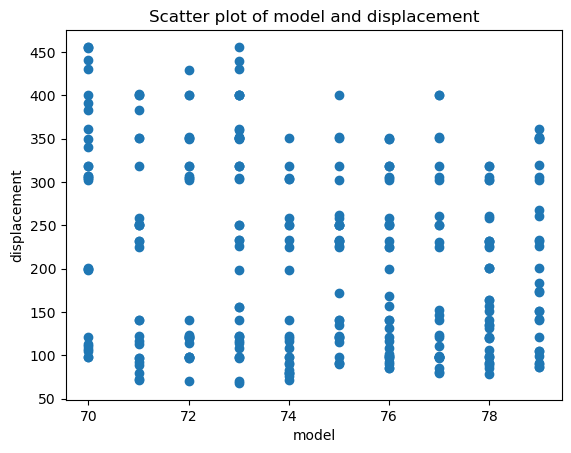

When we look at the entire chart, we see that model rises, displacement tends to rise.
The correlation coefficient between the 2 attributes is positive and equal: -0.20229459872935793


In [15]:
plot_scatter_extract('model', 'displacement',data6)
print('When we look at the entire chart, we see that model rises, displacement tends to rise.')
value = np.corrcoef(np.array(data6['model'].values), np.array(data6['displacement'].values))[0, 1]
print(f'The correlation coefficient between the 2 attributes is positive and equal: {value}')

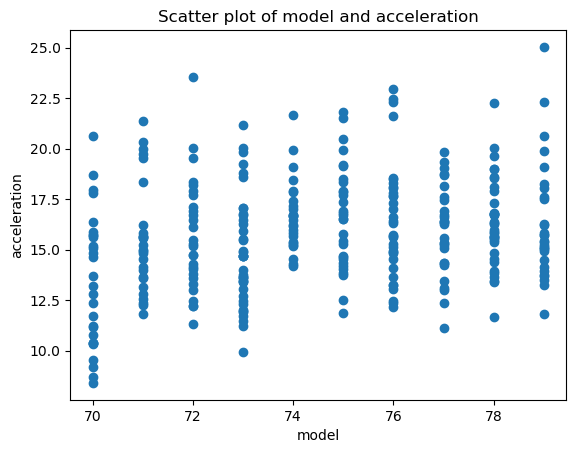

When we look at the entire chart, we see that model rises, acceleration tends to rise.
The correlation coefficient between the 2 attributes is positive and equal: 0.24222651078606197


In [16]:
plot_scatter_extract('model', 'acceleration',data6)
print('When we look at the entire chart, we see that model rises, acceleration tends to rise.')
value = np.corrcoef(np.array(data6['model'].values), np.array(data6['acceleration'].values))[0, 1]
print(f'The correlation coefficient between the 2 attributes is positive and equal: {value}')

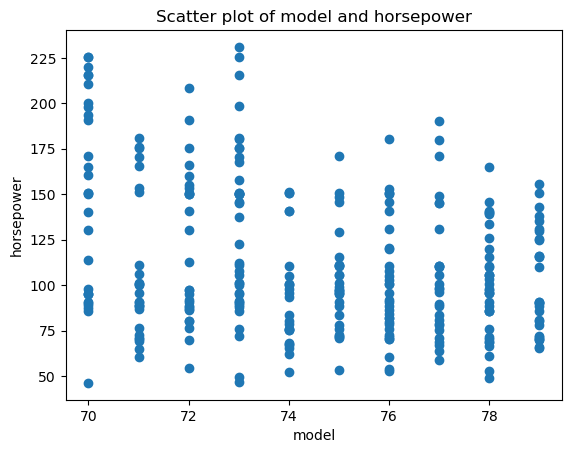

When we look at the entire chart, we see that model rises, horsepower tends to decrease.
The correlation coefficient between the 2 attributes is negative and equal: -0.2809264283375341


In [17]:
plot_scatter_extract('model', 'horsepower',data6)
print('When we look at the entire chart, we see that model rises, horsepower tends to decrease.')
value = np.corrcoef(np.array(data6['model'].values), np.array(data6['horsepower'].values))[0, 1]
print(f'The correlation coefficient between the 2 attributes is negative and equal: {value}')

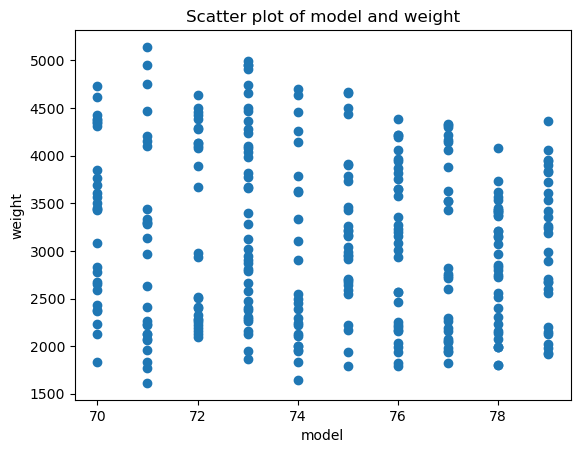

When we look at the entire chart, we see that model rises, weight tends to decrease.
The correlation coefficient between the 2 attributes is negative and equal: -0.1282099332787899


In [18]:
plot_scatter_extract('model', 'weight', data6)
print('When we look at the entire chart, we see that model rises, weight tends to decrease.')
value = np.corrcoef(np.array(data6['model'].values), np.array(data6['weight'].values))[0, 1]
print(f'The correlation coefficient between the 2 attributes is negative and equal: {value}')

In [3]:
# Source about data https://www.retrowaste.com/1970s/cars-in-the-1970s/
print("The evidence on the internet has partly explained the change of properties in the data that we have visualized. The things that we realize after visualizing completely match the evidence on the internet")

The evidence on the internet has partly explained the change of properties in the data that we have visualized. The things that we realize after visualizing completely match the evidence on the internet


In [19]:
# 7. Show 2 more scatterplots that are interesting do you. Discuss what you see.


In [20]:
# 8. Plot a time series for all the companies that show how many new cars they introduces during each year.
# Do you see some interesting trends? (Hint: data.car name.str.split()[0] returns a vector of the first word of car name column.)


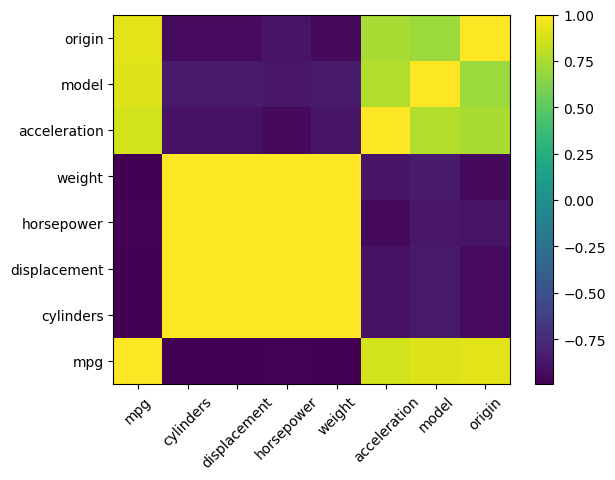

In [21]:
# 9. Calculate the pairwise correlation, and draw the heatmap with Matplotlib. 
# Do you see some interesting correlation? (Hint: data.iloc[:,0:8].corr(), plt.pcolor() draws the heatmap.)
corr = data.iloc[:,0:8].corr()
heat_map = plt.pcolor(corr.corr())
plt.xticks(np.arange(0.5, len(corr.index)), labels=corr.index, rotation = 45)
plt.yticks(np.arange(0.5, len(corr.index)), labels=corr.index)
plt.colorbar(heat_map)
plt.show()